In [1]:
import numpy as np

## Урок 5

#### Вектор – это частный случай матрицы 1хN и Nх1. Повторите материал для векторов, уделяя особое внимание умножению A∙B.

In [26]:
vec = np.array([[1, 2, 3]])

In [28]:
vec[0, 1]

2

In [29]:
vec * 2

array([[2, 4, 6]])

In [30]:
vec + 1

array([[2, 3, 4]])

In [31]:
c = np.array([3, 2, 1])
vec + c

array([[4, 4, 4]])

In [32]:
vec - c

array([[-2,  0,  2]])

In [33]:
vec.transpose()

array([[1],
       [2],
       [3]])

In [35]:
vec2 = np.array([[1], [2], [3]])

In [36]:
vec2

array([[1],
       [2],
       [3]])

In [37]:
vec2.transpose()

array([[1, 2, 3]])

In [38]:
vec * vec2

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [39]:
vec2 * vec

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [40]:
np.dot(vec2, vec)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [41]:
np.dot(vec, vec2)

array([[14]])

#### 5.3 2) Приведите пример матрицы 4х4, ранг которой равен 1.

In [53]:
D = np.array([[1,1,1,1], [2,2,2,2], [3,3,3,3], [4,4,4,4]])
np.linalg.matrix_rank(D, 0.0001)

1

#### 5.4. Вычислите скалярное произведение двух векторов:  (1, 5)  и  (2, 8) (проверка сделанного на листке)

In [54]:
np.dot(np.array([1,5]), np.array([2,8]))

42

#### 5.5 Вычислите смешанное произведение трех векторов: (1, 5, 0), (2, 8, 7) и (7, 1.5, 3) (проверка сделанного на листке)

In [55]:
a = np.array([1,5,0])
b = np.array([2,8,7])
c = np.array([7,1.5,3])
v=np.cross(a,b)
print(np.inner(v, c))

228.5


## Урок 6

#### 1. Решите линейную систему

In [6]:
A = np.array([[1,2,3], [4,0,6], [7,8,9]])
B = np.array([12,2,1])
x = np.linalg.solve(A, B)
x

array([-9.2       ,  0.9       ,  6.46666667])

#### 2. Найдите псевдорешение

x + 2y – z = 1

3x – 4y = 7

8x – 5y + 2z = 12

2x – 5z = 7

11x +4y – 7z = 15


In [56]:
A = np.array([[1,2,-1], [3,-4,0], [8,-5,2], [2,0,-5], [11,4,-7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B)

C:\Users\Viktor.Vashchenkov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [57]:
np.dot(A, [ 1.13919353, -0.90498444, -0.9009803 ]) - B

array([-0.76979505,  0.03751835, -0.16349016, -0.21671144,  0.21805317])

In [59]:
def Q(x, y, z):
    return ((np.linalg.norm(np.dot(A, [x, y, z]) - B))**2)

In [67]:
Q(1.13919353, -0.90498444, -0.9009803)

0.7152321111819737

In [66]:
Q(1.14, -0.9, -0.9)

0.7164000000000003

#### 3. Сколько решений имеет линейная система. Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 


In [104]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
B = np.array([[12,2,1]])
C = np.concatenate((A, B.T), axis=1)
C

array([[ 1,  2,  3, 12],
       [ 4,  5,  6,  2],
       [ 7,  8,  9,  1]])

In [105]:
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

(2, 3)

Решений нет, изменим правую часть, чтобы уравнение стало совместным и выберем 2 уравнения для решения

In [106]:
def q(b):
    C[0, 3] = b
    return np.linalg.matrix_rank(C, 0.0001)

In [107]:
for i in range(10):
    if q(i-5) == 2:
        print(i-5)

3


In [108]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
B = np.array([[3,2,1]])
C = np.concatenate((A, B.T), axis=1)
C

array([[1, 2, 3, 3],
       [4, 5, 6, 2],
       [7, 8, 9, 1]])

In [109]:
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

(2, 2)

In [110]:
np.linalg.solve(A, B)

ValueError: solve: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m,n)->(m,n) (size 1 is different from 3)

Numpy не даёт нам какое-то одно решение
На листочке я решил эту систему (написав зависимости y и z от х), тогда одно из решений будет:

x = 0

y = -4

z = 11 / 3

#### 4. Вычислите LU-разложение матрицы:

#### После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [114]:
import scipy
import scipy.linalg

In [116]:
A = np.array([[1,2,3], [2,16,21], [4,28,73]])
P, L, U = scipy.linalg.lu(A)
print(P)
print(L)
print(U)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [141]:
x_zhelaemoe = np.array([3, 2, 1])
y = np.dot(U, x_zhelaemoe)
b = np.dot(L, y)
np.dot(P, b)

array([ 10.,  59., 141.])

In [129]:
B = np.array([10,59,141])

In [130]:
np.linalg.solve(A, B)

array([3., 2., 1.])

#### 5. Найдите нормальное псевдорешение недоопределенной системы:

x + 2y – z = 1

8x – 5y + 2z = 12

#### Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 

In [142]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

In [146]:
import matplotlib.pyplot as plt

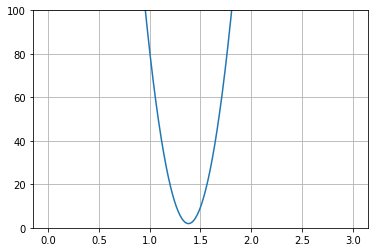

In [148]:
x = np.linspace(0, 3, 1000)
plt.plot(x, Q(x, 10*x-14, 21*x-29))
plt.grid(True)
plt.ylim(0, 100)
plt.show()

In [143]:
A = np.array([[1,2,-1], [8,-5,2]])
B = np.array([1,12])
np.linalg.lstsq(A,B)

C:\Users\Viktor.Vashchenkov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

#### 6. Найдите одно из псевдорешений вырожденной системы:

#### Попробуйте также отыскать и нормальное псевдорешение.

In [149]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
B = np.array([2,5,11])

In [150]:
Q, R = np.linalg.qr(A)
print(Q)
print(R)

[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -8.88178420e-16]]


In [151]:
np.linalg.matrix_rank(A, 0.001)

2

In [152]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [154]:
B1 = np.dot(Q.T, B)[:2]
B1

array([-1.21860576e+01,  3.55271368e-15])

In [155]:
X1 = np.linalg.solve(R1, B1)
X = np.append(X1, 0)
X

array([1.50000000e+00, 3.92767275e-15, 0.00000000e+00])

In [156]:
np.linalg.lstsq(A, B)

C:\Users\Viktor.Vashchenkov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 4.41842475e-16]))

In [157]:
X_horoshee = [1.25,  0.5 , -0.25]

In [163]:
print(np.linalg.norm(np.dot(A, X) - B))
print(np.linalg.norm(X))
print(np.linalg.norm(np.dot(A, X_horoshee) - B))
print(np.linalg.norm(X_horoshee))

1.224744871391589
1.499999999999996
1.224744871391589
1.3693063937629153
